#Task 1

In [52]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

Observation 1: There are 16 columns, besides status_id, status_type and status_published fields which are in non numeric type, the rest of the fields are numeric field.

Observation 2: The last 4 columns are empty

In [4]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

The last 4 columns (Column1, Column2, Column3, Column4) have missing values for all the 7050 observations. The rest of the columns have no missing values.

In [6]:
print(df['status_type'].unique())

['video' 'photo' 'link' 'status']


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["status_type"] = le.fit_transform(df["status_type"])
df["status_published"] = le.fit_transform(df["status_published"])
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,3,3949,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,1,3917,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,3,3921,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,1,3920,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,1,3832,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


#Task 2

In [11]:
from sklearn.preprocessing import MinMaxScaler
num_data = ["num_reactions","num_comments","num_shares","num_likes","num_loves","num_wows","num_hahas","num_sads","num_angrys"]
df[num_data]= MinMaxScaler().fit_transform(df[num_data])
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,3,3949,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,NaN,NaN,NaN,NaN
1,2,1,3917,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN
2,3,3,3921,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,NaN,NaN,NaN,NaN
3,4,1,3920,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN
4,5,1,3832,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN


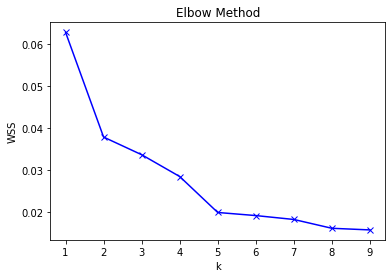

In [43]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

nr = np.array(df['num_reactions'])
nc = np.array(df['num_comments'])


plt.plot()
X = np.array(list(zip(nr, nc))).reshape(len(nr), 2)

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('Elbow Method')
plt.show()

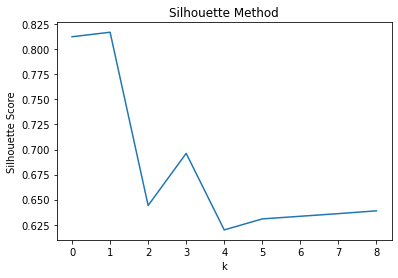

In [47]:
from sklearn.metrics import silhouette_score

ss = []
kmax = 10

for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(df[num_data])
  labels = kmeans.labels_
  ss.append(silhouette_score(df[num_data], labels, metric = 'euclidean'))
plt.plot(ss)
plt.title('Silhouette Method')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

In [48]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(df[num_data])


array([1, 1, 1, ..., 1, 1, 1])

In [49]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score([0, 0, 1, 1], [1, 1, 1, 1])

0.0

#Task 3

In [53]:
from sklearn.decomposition import PCA
df_fruit = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv")
pca = PCA(n_components=2)
pca.fit(df_fruit)
pca.components_

array([[ 7.21640491e-04,  9.99801105e-01,  1.30294190e-02,
         1.50814711e-02, -1.11556357e-04],
       [ 7.62665550e-01, -7.77757544e-03, -1.68186136e-01,
         6.24292671e-01, -1.59013577e-02]])

In [54]:
from sklearn.preprocessing import normalize

df_fruit_scaled = normalize(df_fruit)
df_fruit_scaled = pd.DataFrame(df_fruit_scaled, columns=df_fruit.columns)
df_fruit_scaled.head()

,fruit_label,mass,width,height,color_score
0,0.005200,0.998307,0.043676,0.037956,0.002860
1,0.005546,0.998282,0.044368,0.037713,0.003272
2,0.005672,0.998262,0.041972,0.040838,0.003403
3,0.023154,0.995623,0.071777,0.054412,0.009262
4,0.023706,0.995650,0.071118,0.054524,0.009364


In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(df_fruit_scaled)
print(pca.components_)
print('\nVariance ratio:', pca.explained_variance_ratio_)

[[-0.5778779   0.06839382 -0.50283363 -0.63311812 -0.08774512]
 [-0.45195035 -0.01964077  0.83947009 -0.2737081   0.12541518]
 [ 0.67862746  0.0025227   0.12398342 -0.72292368  0.03831291]
 [ 0.02171953  0.04165841  0.15852612 -0.00454545 -0.98622596]]

Variance ratio: [0.71598844 0.22788447 0.05498702 0.00108144]
